<center>Notebook - 003 </center>

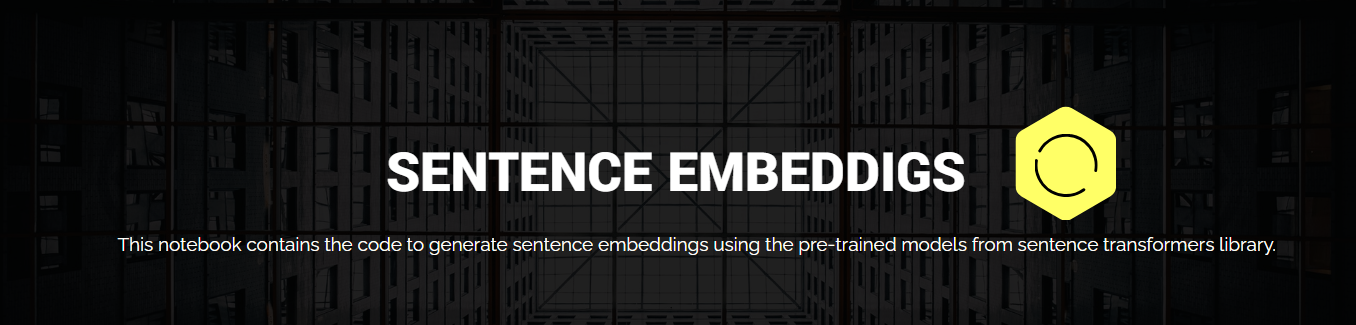

##### Link : [sentence-transformers](https://www.sbert.net/index.html) library.

!pip install sentence_transformers

## IMPORT LIBRARIES

In [2]:
import pandas as pd
from pathlib import Path

from sentence_transformers import SentenceTransformer

## LOAD THE DATA

In [3]:
PATH_DATA_BASE = Path.cwd().parent / "data"
PATH_SENTENCES = Path.cwd().parent / "Models/Sentences"
PATH_EMBEDDINGS = Path.cwd().parent / "Models/Embeddings"

In [4]:
# Setting pandas option to display the full content of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

In [5]:
import pandas as pd
dataset = pd.read_csv(PATH_DATA_BASE / 'Filtered_arxiv_papers.csv')
dataset.head()

,titles,abstracts,terms,urls,ids
0,Point2Mask: Point-supervised Panoptic Segmentation via Optimal Transport,"Weakly-supervised image segmentation has recently attracted increasing\nresearch attentions, aiming to avoid the expensive pixel-wise labeling. In this\npaper, we present an effective method, namely Point2Mask, to achieve\nhigh-quality panoptic prediction using only a single random point annotation\nper target for training. Specifically, we formulate the panoptic pseudo-mask\ngeneration as an Optimal Transport (OT) problem, where each ground-truth (gt)\npoint label and pixel sample are defined as the label supplier and consumer,\nrespectively. The transportation cost is calculated by the introduced\ntask-oriented maps, which focus on the category-wise and instance-wise\ndifferences among the various thing and stuff targets. Furthermore, a\ncentroid-based scheme is proposed to set the accurate unit number for each gt\npoint supplier. Hence, the pseudo-mask generation is converted into finding the\noptimal transport plan at a globally minimal transportation cost, which can be\nsolved via the Sinkhorn-Knopp Iteration. Experimental results on Pascal VOC and\nCOCO demonstrate the promising performance of our proposed Point2Mask approach\nto point-supervised panoptic segmentation. Source code is available at:\nhttps://github.com/LiWentomng/Point2Mask.",['cs.CV'],http://arxiv.org/abs/2308.01779v1,2308.01779v1
1,Two Approaches to Supervised Image Segmentation,"Though performed almost effortlessly by humans, segmenting 2D gray-scale or\ncolor images in terms of regions of interest (e.g.~background, objects, or\nportions of objects) constitutes one of the greatest challenges in science and\ntechnology as a consequence of the involved dimensionality reduction(3D to 2D),\nnoise, reflections, shades, and occlusions, among many other possible effects.\nWhile a large number of interesting related approaches have been suggested\nalong the last decades, it was mainly thanks to the recent development of deep\nlearning that more effective and general solutions have been obtained,\ncurrently constituting the basic comparison reference for this type of\noperation. Also developed recently, a multiset-based methodology has been\ndescribed that is capable of encouraging image segmentation performance while\ncombining spatial accuracy, stability, and robustness while requiring little\ncomputational resources (hardware and/or training and recognition time). The\ninteresting features of the multiset neurons methodology mostly follow from the\nenhanced selectivity and sensitivity, as well as good robustness to data\nperturbations and outliers, allowed by the coincidence similarity index on\nwhich the multiset approach to supervised image segmentation is based. After\ndescribing the deep learning and multiset neurons approaches, the present work\ndevelops two comparison experiments between them which are primarily aimed at\nillustrating their respective main interesting features when applied to the\nadopted specific type of data and parameter configurations. While the deep\nlearning approach confirmed its potential for performing image segmentation,\nthe alternative multiset methodology allowed for enhanced accuracy while\nrequiring little computational resources.",['cs.CV'],http://arxiv.org/abs/2307.10123v2,2307.10123v2
2,Semi-Siamese Network for Robust Change Detection Across Different Domains with Applications to 3D Printing,"Automatic defect detection for 3D printing processes, which shares many\ncharacteristics with change detection problems, is a vital step for quality\ncontrol of 3D printed products. However, there are some critical challenges in\nthe current state of practice. First, existing methods for computer\nvision-based process monitoring typically work well only under specific camera\nviewpoints and lighting situations, requiring expensive pre-processing,\nalignment, and camera setups. Second, many defect detection techniques are\ns

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87480 entries, 0 to 87479
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     87480 non-null  object
 1   abstracts  87480 non-null  object
 2   terms      87480 non-null  object
 3   urls       87480 non-null  object
 4   ids        87480 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB


<CENTER><H2><B>Sentence-Transformers Models</B></H2></CENTER>

<h3>What is a sentence-transformers model?</h3>
    <h4> - It maps sentences & paragraphs to a N dimensional dense vector space and can be used for tasks like clustering or semantic search.</h4>


### After comparing different models I have choosed the `all-MiniLM-L6-v2` Model .

- MiniLM is a smaller variant of the BERT model which has been designed to provide high-quality language understanding capabilities while being significantly smaller and more efficient. The "all-MiniLM-L6-v2" model refers to a specific configuration of the MiniLM model.

#### Here are some reasons why I have chosen this model for my project:
---
1. Efficiency:
   - MiniLM models are smaller and faster than full-size BERT models, which can be a major advantage if you're working on a project with limited computational resources or if you need to process large amounts of data quickly.
---
2. Performance:
   - Despite their smaller size, MiniLM models often perform at a comparable level to full-size BERT models on a variety of NLP tasks.
   - This means that you can often use a MiniLM model without sacrificing much in the way of performance.
   - In fact, the Performance Sentence Embeddings metric which is the average performance on encoding sentences over 14 diverse tasks from different domains is `68.06` for the `all-MiniLM-L6-v2` model, which is very good to start with.
---

3. Ease of Use:
- If you're using a library like Hugging Face's Transformers, it can be relatively straightforward to load a pre-trained MiniLM model and fine-tune it for your specific task.
---
4. Lower Memory Requirements:
   - Given its smaller size, MiniLM requires less memory for training and inference.
   - This could be a crucial factor if you're working with limited hardware resources

## Loading The Pre_trained Models (Choosed after comparision)

In [49]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Our feature we like to encode
sentences = dataset['titles']

# Features are encoded by calling model.encode()
embeddings = model.encode(sentences)

### Print the embeddings

In [50]:
c = 0
for sentence, embedding in zip(sentences, embeddings):

    print("Sentence:", sentence)
    print("Embedding dimension:", len(embedding))
    print("Title length:", len(sentence))
    print(80*"__")

    if c >=5:
        break
    c +=1 

Sentence: Point2Mask: Point-supervised Panoptic Segmentation via Optimal Transport
Embedding dimension: 384
Title length: 72
________________________________________________________________________________________________________________________________________________________________
Sentence: Two Approaches to Supervised Image Segmentation
Embedding dimension: 384
Title length: 47
________________________________________________________________________________________________________________________________________________________________
Sentence: Semi-Siamese Network for Robust Change Detection Across Different Domains with Applications to 3D Printing
Embedding dimension: 384
Title length: 106
________________________________________________________________________________________________________________________________________________________________
Sentence: Data-Centric Diet: Effective Multi-center Dataset Pruning for Medical Image Segmentation
Embedding dimension: 384
Title le

## Save the Model

In [51]:
import pickle

# Saving sentences and corresponding embeddings
with open(PATH_EMBEDDINGS / 'Embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

with open(PATH_SENTENCES / 'Sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

# Testing the embedding model¶

### Test case 1 

In [52]:
paper_you_like = input("Enter your topic of interest here 👇 \n")
paper_you_like

Enter your topic of interest here 👇 
 Large Language Models


'Large Language Models'

In [53]:
from sentence_transformers import util
cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like))

In [54]:
import torch
top_similar_papers = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
top_similar_papers

torch.return_types.topk(
values=tensor([[1.0000],
        [0.9451],
        [0.9217],
        [0.9169],
        [0.9029]]),
indices=tensor([[18195],
        [52303],
        [51078],
        [19981],
        [52163]]))

In [55]:
for i in top_similar_papers.indices:
    print(sentences[i.item()])

Large Language Models
Talking About Large Language Models
Challenges and Applications of Large Language Models
A Survey of Large Language Models
Eight Things to Know about Large Language Models


In [56]:
output = []
for i in top_similar_papers.indices:
    output.append(sentences[i.item()])

output = []
for i in top_similar_papers.indices:
    output.append(sentences[i.item()])

result = output[0]

embedding1 = model.encode(paper_you_like, convert_to_tensor=True)
embedding2 = model.encode(result , convert_to_tensor=True)

# compute cosine similarity
cosine_scores_1 = util.pytorch_cos_sim(embedding1, embedding2)
print("Cosine similarity:", cosine_scores_1.item())

Cosine similarity: 1.0000001192092896


### Test Case 2

In [57]:
from sentence_transformers import util
import torch
 

paper_you_like2 = input("Enter your topic of interest here 👇 \n")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
print(50*'*')


papers = []
for i in top_similar_papers2.indices:
    print("->" , sentences[i.item()])
    print('')
    papers.append(sentences[i.item()])


embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers , convert_to_tensor=True)

# Find the index of the most similar paper
cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)
print(50*'*')
print("Most similar paper:" , papers[max_similarity_index.item()])

# Get the cosine similarity scores of all papers
cosine_similarity_scores = cosine_scores_2[0].tolist()

# Print the cosine similarity score of the most similar paper
cosine_similarity_score = cosine_similarity_scores[max_similarity_index.item()]
print("Cosine similarity score of the most similar paper:", cosine_similarity_score)

Enter your topic of interest here 👇 
 I want the paper for Large Language Models


**************************************************
-> Talking About Large Language Models

-> Eight Things to Know about Large Language Models

-> Large Language Models

-> Challenges and Applications of Large Language Models

-> Small Models are Valuable Plug-ins for Large Language Models

**************************************************
Most similar paper: Talking About Large Language Models
Cosine similarity score of the most similar paper: 0.838924765586853


## Testing with general sentences

In [58]:
sentence1 = "Indian will be playing FIFA soon"
sentence2 = "Its raining outside I can't go the market"

# encode sentences to get their embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)

# compute cosine similarity
cosine_scores__1 = util.pytorch_cos_sim(embedding1, embedding2)
print("Cosine similarity:", cosine_scores__1.item())


Cosine similarity: 0.0726933404803276


#### Print the embeddings

## all-MiniLM-L6-v2

#### Test case 1

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os

paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation LDA"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)
model_name = "allMiniLM-l6-v2"
# Start MLflow run and set the experiment
mlflow.set_experiment("allMiniLM-l6-v2") 
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("Model", model_name)
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(40 * '__')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


In [ ]:
# !mlflow ui

In [ ]:



# paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation (LDA)"

# cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

# top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

# papers = []
# for i in top_similar_papers2.indices:
#     papers.append(sentences[i.item()])

# embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
# embedding02 = model.encode(papers, convert_to_tensor=True)

# cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
# max_similarity_index = torch.argmax(cosine_scores_2)

# # Start MLflow run and set the experiment
# mlflow.set_experiment("Similarity - allMiniLM-l6-v2")  # Set your desired experiment name
# with mlflow.start_run() as run:
#     # Log parameters and metrics
#     mlflow.log_param("input_paper", paper_you_like2)
#     mlflow.log_param("num_similar_papers", len(papers))
#     mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
#     mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

#     # Print the results
#     print(50 * '*')
#     print("Most similar paper:", papers[max_similarity_index.item()])
#     print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


In [ ]:
# !mlflow ui


# all-mpnet-base-v2

In [7]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os
from sentence_transformers import SentenceTransformer


sentences = dataset['titles']

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences)


paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation LDA"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)

model_name = "all-mpnet-base-v2"

# Start MLflow run and set the experiment
mlflow.set_experiment("Model 2 - all-mpnet-base-v2")  # Set your desired experiment name
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("Model", model_name)
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(50 * '__')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


2023/08/05 10:08:31 INFO mlflow.tracking.fluent: Experiment with name 'Model 2 - all-mpnet-base-v2' does not exist. Creating a new experiment.


____________________________________________________________________________________________________
Most similar paper: Discriminative Topic Modeling with Logistic LDA
Cosine similarity score of the most similar paper: tensor(0.6663)


# all-distilroberta-v1


In [8]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os
from sentence_transformers import SentenceTransformer

sentences = dataset['titles']

model = SentenceTransformer('all-distilroberta-v1')
embeddings = model.encode(sentences)

paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation LDA"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)

model_ = "all-distilroberta-v1"

# Start MLflow run and set the experiment
mlflow.set_experiment("Model 3 - all-distilroberta-v1")  
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("Model", model_)
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(50 * '__')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


2023/08/05 10:42:27 INFO mlflow.tracking.fluent: Experiment with name 'Model 3 - all-distilroberta-v1' does not exist. Creating a new experiment.


____________________________________________________________________________________________________
Most similar paper: n-stage Latent Dirichlet Allocation: A Novel Approach for LDA
Cosine similarity score of the most similar paper: tensor(0.6715)


In [9]:
!mlflow ui

^C


# all-MiniLM-L12-v2

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
import mlflow
import os
from sentence_transformers import SentenceTransformer


sentences = dataset['titles']

model = SentenceTransformer('all-MiniLM-L12-v2')
embeddings = model.encode(sentences)


paper_you_like2 = "I Want the paper for Topic Modeling With Latent Dirichitley Allocation (LDA)"

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))

top_similar_papers2 = torch.topk(cosine_scores, dim=0, k=5, sorted=True)

papers = []
for i in top_similar_papers2.indices:
    papers.append(sentences[i.item()])

embedding01 = model.encode(paper_you_like2, convert_to_tensor=True)
embedding02 = model.encode(papers, convert_to_tensor=True)

cosine_scores_2 = util.pytorch_cos_sim(embedding01, embedding02)
max_similarity_index = torch.argmax(cosine_scores_2)
model_name = "all-MiniLM-L12-v2"
# Start MLflow run and set the experiment
mlflow.set_experiment("all-MiniLM-L12-v2") 
with mlflow.start_run() as run:
    # Log parameters and metrics
    mlflow.log_param("input_paper", paper_you_like2)
    mlflow.log_param("Model", model_name)
    mlflow.log_param("num_similar_papers", len(papers))
    mlflow.log_param("most_similar_paper", papers[max_similarity_index.item()])
    mlflow.log_metric("cosine_similarity_score", cosine_scores_2[0, max_similarity_index.item()])

    # Print the results
    print(50 * '*')
    print("Most similar paper:", papers[max_similarity_index.item()])
    print("Cosine similarity score of the most similar paper:", cosine_scores_2[0, max_similarity_index.item()])


<center><H1>COMPARISIN TABLE</H1></center>

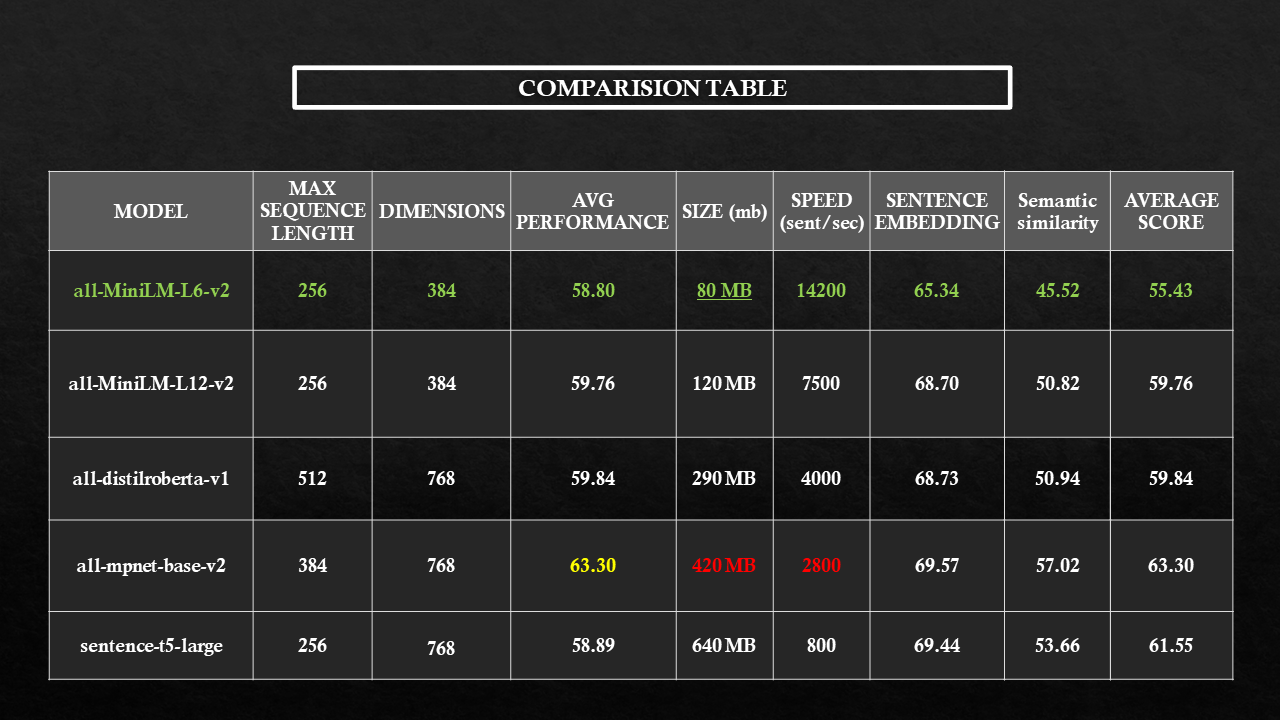

#### Here are some reasons why I have chosen this model for my project:
---
1. Efficiency:
   - MiniLM models are smaller and faster than full-size BERT models, which can be a major advantage if you're working on a project with limited computational resources or if you need to process large amounts of data quickly.
---
2. Performance:
   - Despite their smaller size, MiniLM models often perform at a comparable level to full-size BERT models on a variety of NLP tasks.
   - This means that you can often use a MiniLM model without sacrificing much in the way of performance.
   - In fact, the Performance Sentence Embeddings metric which is the average performance on encoding sentences over 14 diverse tasks from different domains is `68.06` for the `all-MiniLM-L6-v2` model, which is very good to start with.
---

3. Ease of Use:
- If you're using a library like Hugging Face's Transformers, it can be relatively straightforward to load a pre-trained MiniLM model and fine-tune it for your specific task.
---
4. Lower Memory Requirements:
   - Given its smaller size, MiniLM requires less memory for training and inference.
   - This could be a crucial factor if you're working with limited hardware resources

In [2]:
# !mlflow ui